MACHINE LEARNING PROJECT

Project Name : Laptop Price Prediction Using Machine Learning.

Project by : Vanita Digambar Jagtap

Guided by : Sameer Warsolkar Sir

In [79]:
#let’s import the libraries and load our data. 
#After we’ve taken a look at the head, shape, info, any NULL values and duplicate values, there are a few more things to consider.

In [2]:
#Importing Required Libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\Vanita\laptop_data.csv") # Importing csv in python.
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [10]:
df.head() # To see what the data set looks like, we'll use the head() method.

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [14]:
df.describe(include="all") # To get full summary statistics.

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1303.00000,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,727,NaN,507,190,619,412,281,1072,121,NaN
mean,651.00000,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59870.042910
std,376.28801,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37243.201786
min,0.00000,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,325.50000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,651.00000,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52054.560000
75%,976.50000,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79274.246400


In [18]:
df.shape # To check rows and columns count.

(1303, 12)

In [20]:
df.info() # It provides concise summary of dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [22]:
df.duplicated().sum() 

0

In [24]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [26]:
df.notnull().sum()

Unnamed: 0          1303
Company             1303
TypeName            1303
Inches              1303
ScreenResolution    1303
Cpu                 1303
Ram                 1303
Memory              1303
Gpu                 1303
OpSys               1303
Weight              1303
Price               1303
dtype: int64

In [28]:
#We can update the `Price` column such that all values are rounded to nearest 2 decimal places by using `numpy.round()`

df[['Price']] = np.round(df[['Price']],2)

In [30]:
df.drop(columns = ["Unnamed: 0"],inplace=True) # To remove unwanted columns.

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.52
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.34
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.81


# There are no NULL values. And we need to make slight changes in weight and Ram column to convert them to numeric by removing the unit written after the value. So, we will perform data cleaning here to get the correct types of columns.

In [35]:
df['Ram']= df['Ram'].str.replace('GB','')   # To Replace 'GB' from Ram column.
df['Weight']= df['Weight'].str.replace('kg','')   #To Replace 'kg' from Weight column.

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81


In [39]:
df['Ram'] =df['Ram'].astype('int32') # To change type of 'Ram' column.
df['Weight']=df['Weight'].astype('float32')  # To change type of 'Weight' column.          

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Exploratory Data Analysis


In [44]:
import seaborn as sns

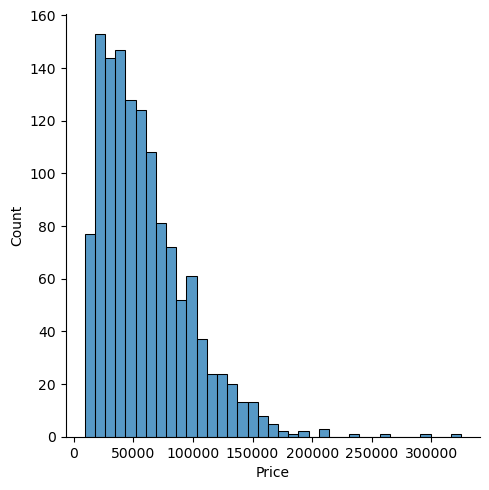

In [46]:
sns.displot(df["Price"])  # Distribution of target column

# The distribution of the target variable is skewed and it is obvious that low-price commodities are sold rather than branded ones.

<Axes: xlabel='Company'>

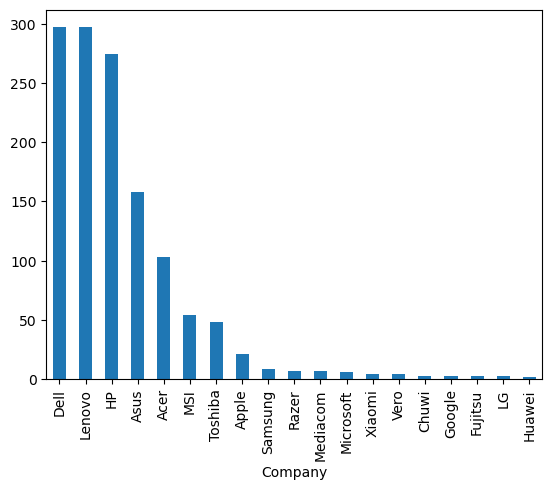

In [52]:
df["Company"].value_counts().plot(kind='bar') # Distribution of company name.

In [ ]:
# We can see which company has the higher number of laptops.

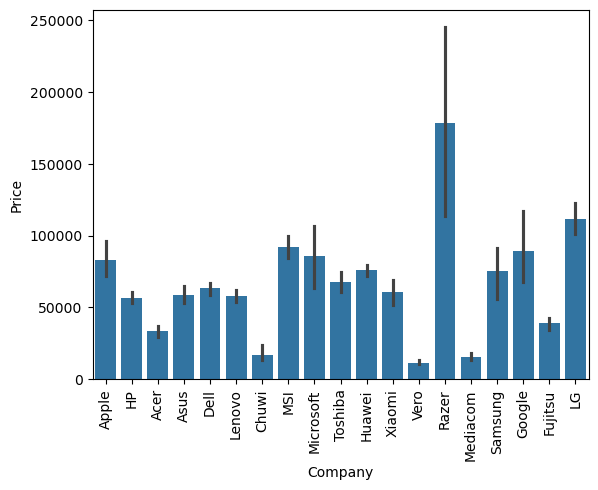

In [54]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# we plot the company relationship with price then we can observe that how price varies with different brands.

<Axes: xlabel='TypeName'>

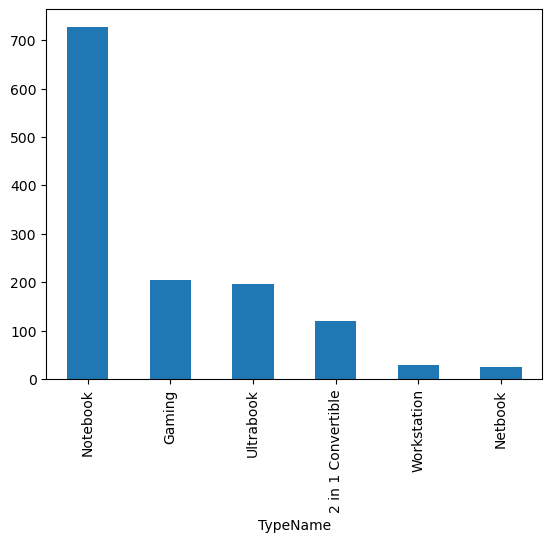

In [56]:
df["TypeName"].value_counts().plot(kind="bar")

In [ ]:
#We can check which type of laptop are available like a gaming laptop, workstation, or notebook.

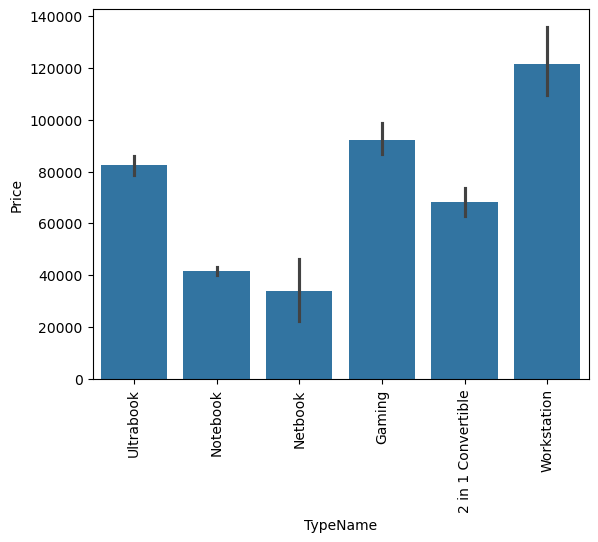

In [60]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#We can check the average price of laptop by each TypeName.

<Axes: xlabel='Inches', ylabel='Density'>

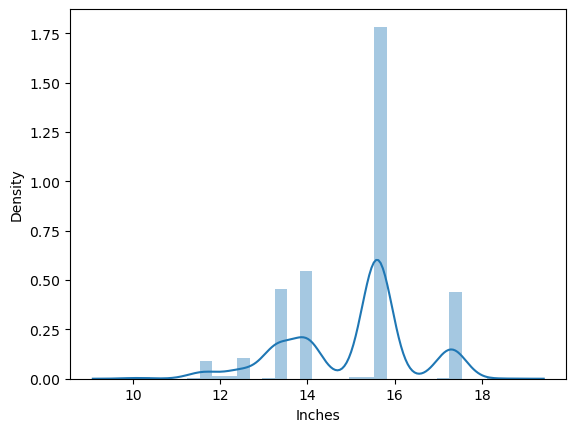

In [62]:
sns.distplot(df["Inches"])

<Axes: xlabel='Inches', ylabel='Price'>

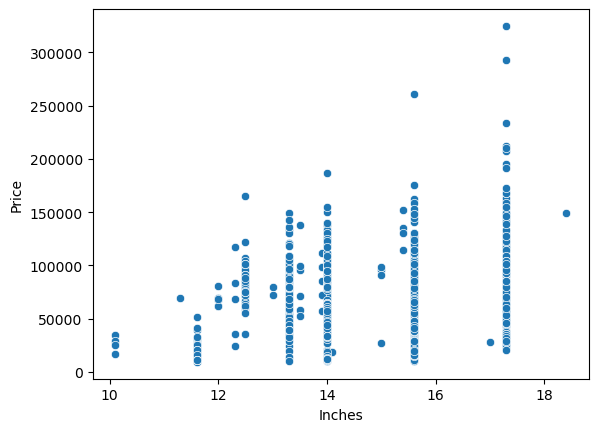

In [64]:
sns.scatterplot(x=df['Inches'],y=df['Price'])  #To check the correlation between Inches and Price.

In [109]:
#We can conclude that there is a relationship but not a strong relationship between the price and size column.

In [66]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [111]:
#We need to perform feature engineering over it.

In [68]:
df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: ScreenResolution, Length: 1303, dtype: int64

In [70]:
df['Touchscreen']= df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [243]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0


<Axes: xlabel='Touchscreen'>

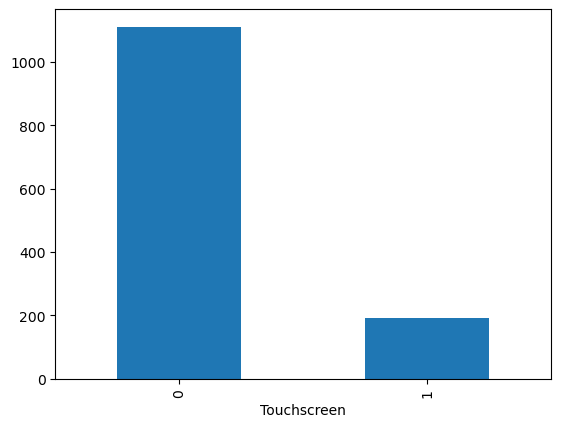

In [72]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

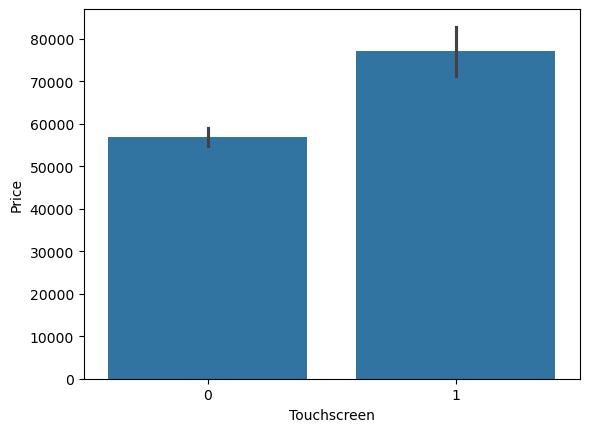

In [74]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [76]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [78]:
df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
705,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,42357.60,0,0
308,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,43636.32,0,0
171,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,2TB HDD,AMD Radeon 520,Windows 10,2.71,37242.72,0,1
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1
195,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,48697.92,0,1
349,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 530,Windows 10,1.90,35324.64,0,0
414,Asus,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.27,49443.84,1,1


<Axes: xlabel='Ips'>

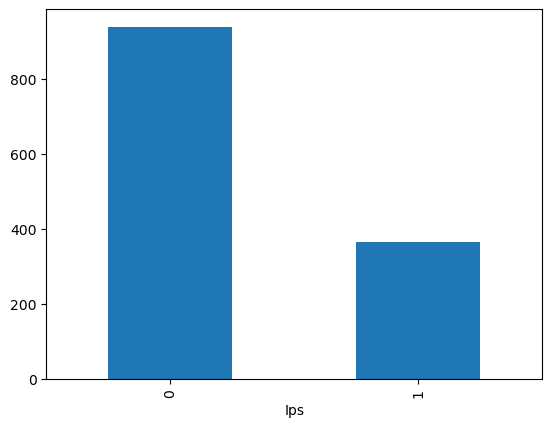

In [80]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

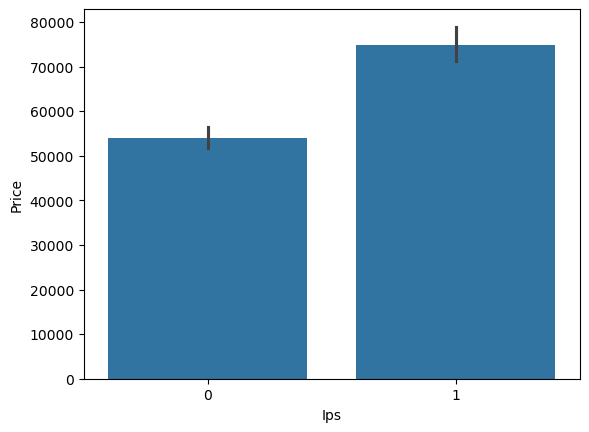

In [82]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [84]:
df['ScreenResolution'].str.split('x')

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [102]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [104]:
df['x_Res']=new[0]
df['y_Res']=new[1]

In [106]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_Res,y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,IPS Panel Retina Display 2560,1600


In [110]:
df['x_Res']= df['x_Res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [112]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_Res,y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,2560,1600


In [114]:
df['x_Res']=df['x_Res'].astype('int')
df['y_Res']=df['y_Res'].astype('int')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_Res             1303 non-null   int32  
 14  y_Res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [124]:
numeric_df = df.select_dtypes(include=['number'])
Correlation = numeric_df.corr()['Price']
print(Correlation)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_Res          0.556529
y_Res          0.552809
Name: Price, dtype: float64


In [126]:
df['ppi']=(((df['x_Res']**2)+(df['y_Res']**2))**0.5/df['Inches']).astype('float')

In [130]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()['Price']
print(correlation)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_Res          0.556529
y_Res          0.552809
ppi            0.473487
Name: Price, dtype: float64


In [132]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_Res,y_Res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,2560,1600,226.983005


In [134]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [136]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_Res,y_Res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,2560,1600,226.983005


In [138]:
df.drop(columns=['Inches','x_Res','y_Res'],inplace=True)

In [140]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005


In [142]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [144]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [146]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
158,Dell,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56,55890.72,1,0,141.211998,Intel Core i7
408,Lenovo,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.20,21791.52,0,0,141.211998,Intel Core i3
984,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.75,48751.20,0,0,111.935204,Intel Core i5
257,HP,Notebook,Intel Core i7 8550U 1.8GHz,16,1TB HDD,Nvidia GeForce MX150,Windows 10,2.90,56423.52,0,1,127.335675,Intel Core i7
806,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,41558.40,0,0,100.454670,Intel Core i5
1236,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,117119.56,0,0,209.800683,Intel Core i7
92,HP,Notebook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,63776.16,0,0,165.632118,Intel Core i7
141,Lenovo,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,1.75,59461.55,0,1,157.350512,Intel Core i5
679,Acer,Gaming,Intel Core i5 7300HQ 2.5GHz,16,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,69210.72,0,0,141.211998,Intel Core i5
318,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,52214.40,0,0,157.350512,Intel Core i5


In [148]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [150]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [152]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
575,Mediacom,Notebook,Intel Atom x5-Z8350 1.44GHz,4,32GB SSD,Intel HD Graphics,Windows 10,1.40,13266.72,0,0,157.350512,Intel Atom x5-Z8350,Other Intel Processor
1293,Lenovo,Notebook,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.72,0,1,141.211998,Intel Core i7,Intel Core i7
358,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,Windows 10,2.36,29696.67,1,0,100.454670,Intel Core i5,Intel Core i5
880,HP,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,90576.00,1,0,165.632118,Intel Core i5,Intel Core i5
383,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.50,58554.72,0,1,157.350512,Intel Core i5,Intel Core i5
506,Asus,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.00,65214.72,0,0,141.211998,Intel Core i7,Intel Core i7
1284,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,157.350512,Intel Core i7,Intel Core i7
741,Dell,Notebook,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.00,35431.20,0,0,100.454670,Intel Core i3,Intel Core i3
1295,Dell,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.15,0,0,100.454670,Intel Core i7,Intel Core i7
791,Vero,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.22,10810.51,0,0,157.350512,Intel Celeron Dual,Other Intel Processor


<Axes: xlabel='Cpu brand'>

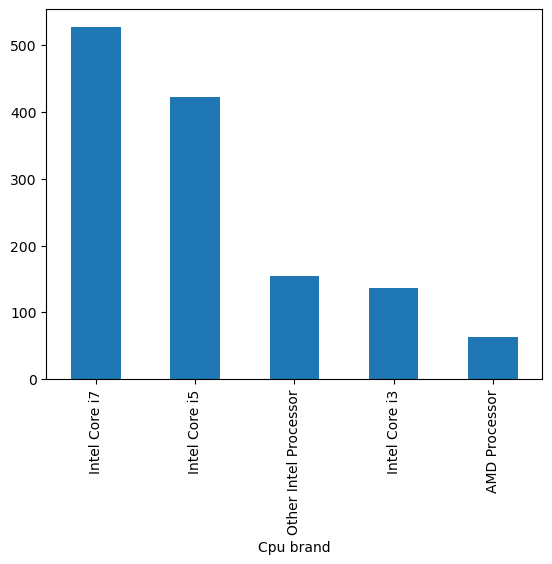

In [154]:
df['Cpu brand'].value_counts().plot(kind='bar')

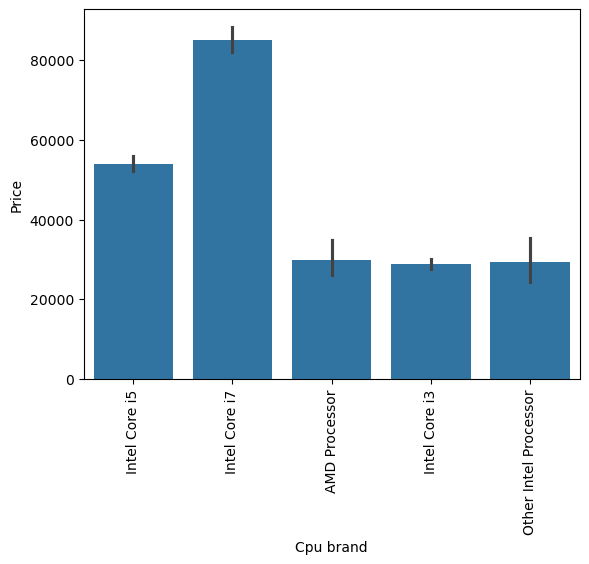

In [156]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

In [158]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [160]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  ppi          1303 non-null   float64
 11  Cpu brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


<Axes: xlabel='Ram'>

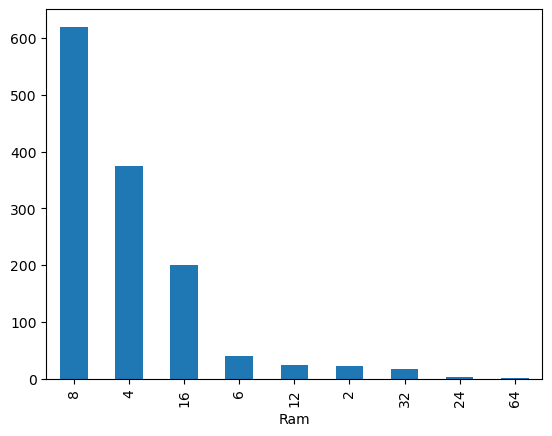

In [164]:
df['Ram'].value_counts().plot(kind='bar') #Price with Ram

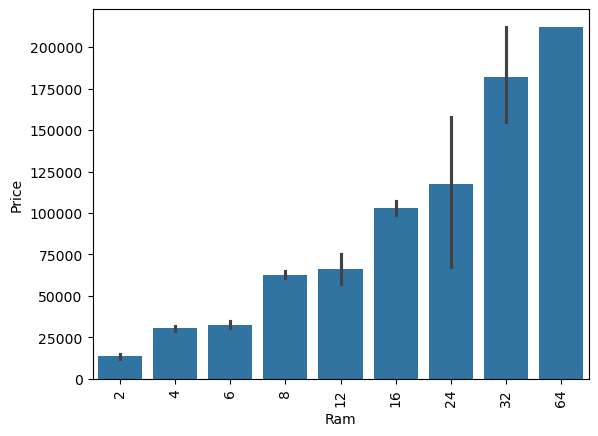

In [166]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [150]:
#Price is having a very strong positive correlation with Ram showing linear relationship.

In [168]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [170]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [172]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5


In [174]:
df['SSD'] = df['Memory'].apply(lambda x: x.split('SSD')[0].split( )[-1] if 'SSD' in x else 0)


df['HDD'] = df['Memory'].apply(lambda x: x.split('HDD')[0].split( )[-1] if 'HDD' in x else 0)


df['Flash'] = df['Memory'].apply(lambda x: x.split('Flash')[0] if 'Flash' in x else 0)


df['Hybrid'] = df['Memory'].apply(lambda x: x.split('Hybrid')[0].split( )[-1] if 'Hybrid' in x else 0)

In [176]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Flash,Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5,256,0,0,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  ppi          1303 non-null   float64
 11  Cpu brand    1303 non-null   object 
 12  SSD          1303 non-null   object 
 13  HDD          1303 non-null   object 
 14  Flash        1303 non-null   object 
 15  Hybrid       1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(10)
memory usage: 152.8+ KB


In [180]:
df['SSD'] = df['SSD'].astype('int')
df['HDD']=df['HDD'].astype('int')
df['Flash']=df['Flash'].astype('int')
df['Hybrid']=df['Hybrid'].astype('float')

In [182]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()['Price']
print(correlation)

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
SSD            0.676202
HDD           -0.095672
Flash         -0.040511
Hybrid         0.007989
Name: Price, dtype: float64


In [184]:
df.drop(columns=['Hybrid','Flash'],inplace=True)

In [186]:
df.head(1249)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,HP,Notebook,4,256 SSD,Intel HD Graphics 520,Windows 7,1.54,58607.47,0,0,157.350512,Intel Core i5,256,0
1245,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,85248.00,0,1,141.211998,Intel Core i7,256,1000
1246,Dell,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,1.60,46620.00,0,0,111.935204,Intel Core i5,0,500
1247,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.34,123876.00,0,1,141.211998,Intel Core i7,256,1000


In [188]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [190]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [192]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5,256,0,Intel


In [194]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [196]:
df = df[df['Gpu brand'] != 'ARM']

In [198]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

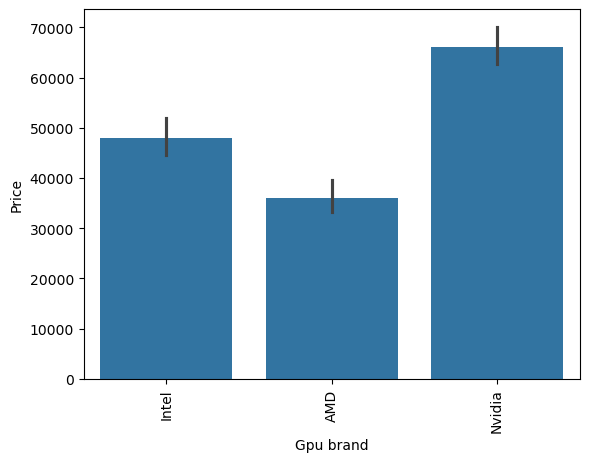

In [200]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [202]:
df.drop(columns=['Gpu'],inplace=True)

In [204]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

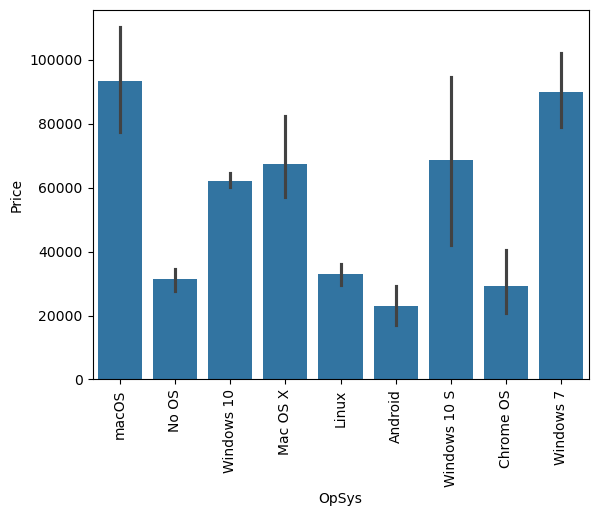

In [206]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [210]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [212]:
df['os'] = df['OpSys'].apply(cat_os)

In [214]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378.68,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895.52,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,256 SSD,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195.34,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095.81,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


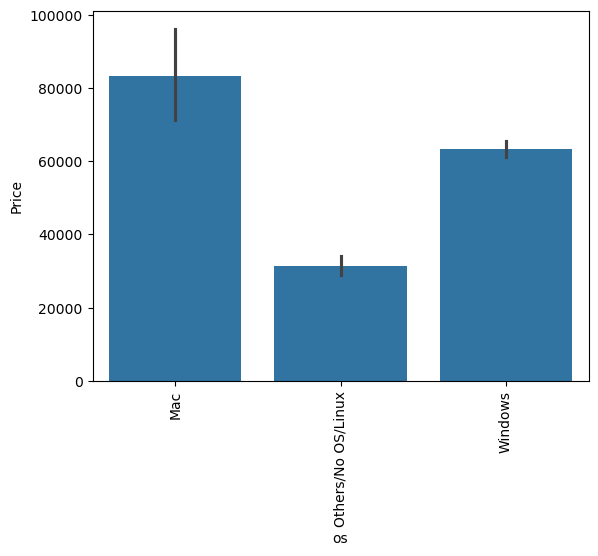

In [216]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

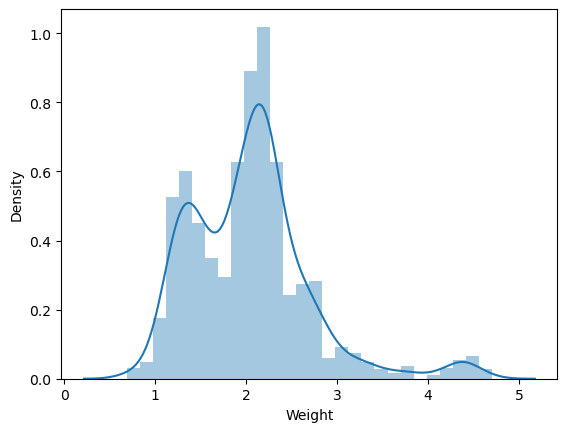

In [218]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

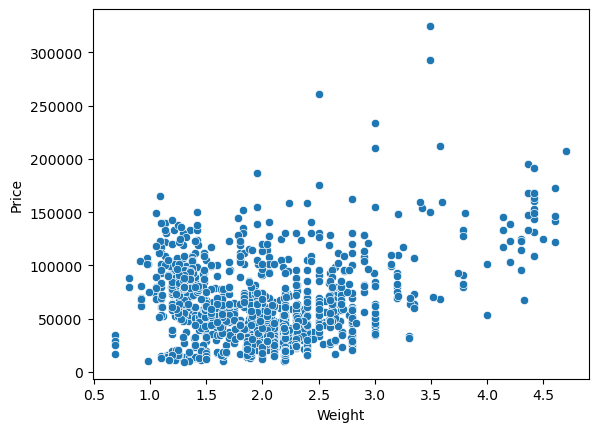

In [220]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [224]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()['Price']
print(correlation)

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
SSD            0.676066
HDD           -0.096122
Name: Price, dtype: float64


<Axes: >

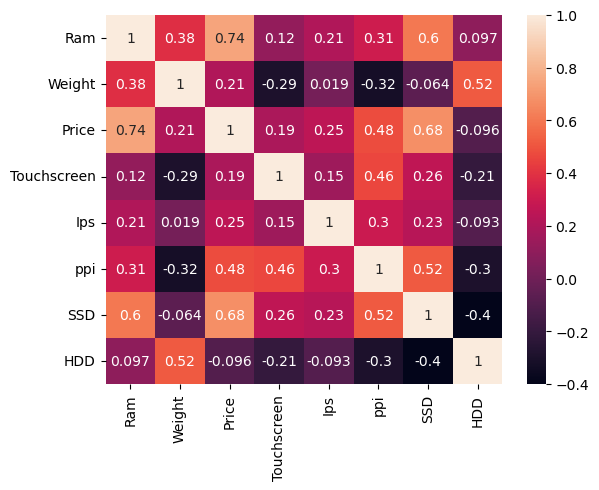

In [226]:
sns.heatmap(numeric_df.corr(),annot=True)

<Axes: xlabel='Price', ylabel='Density'>

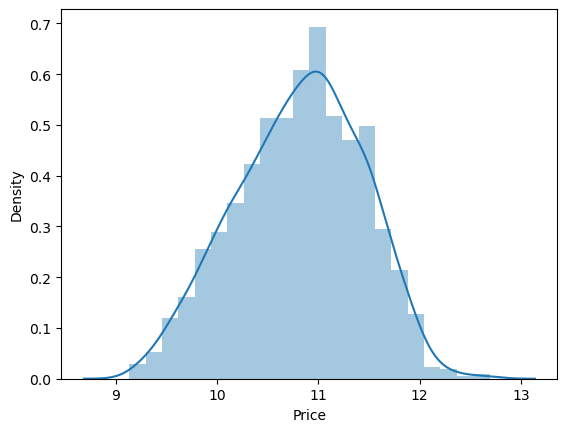

In [228]:
sns.distplot(np.log(df['Price'])) # Applied np.log to the Price column and got a Gaussian distribution.

In [230]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#from xgboost import XGBRegressor

In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [234]:
#df_category =df.select_dtypes("object")
#df_category
df_cat_col_list =list(df.select_dtypes("object").columns)
df_cat_col_list

['Company', 'TypeName', 'Memory', 'OpSys', 'Cpu brand', 'Gpu brand', 'os']

In [236]:
for i in df_cat_col_list:
    df[i]=le.fit_transform(df[i])
df

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,1,4,8,7,8,1.37,71378.68,0,1,226.983005,2,128,0,1,0
1,1,4,8,5,8,1.34,47895.52,0,0,127.677940,2,0,0,1,0
2,7,3,8,16,4,1.86,30636.00,0,0,141.211998,2,256,0,1,1
3,1,4,16,28,8,1.83,135195.34,0,1,220.534624,3,512,0,0,0
4,1,4,8,16,8,1.37,96095.81,0,1,226.983005,2,256,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,4,7,5,1.80,33992.64,1,1,157.350512,3,128,0,1,2
1299,10,0,16,28,5,1.30,79866.72,1,1,276.053530,3,512,0,1,2
1300,10,3,2,34,5,1.50,12201.12,0,0,111.935204,4,0,0,1,2
1301,7,3,6,0,5,2.19,40705.92,0,0,100.454670,3,0,1000,0,2


In [238]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [240]:
x

,Company,TypeName,Ram,Memory,OpSys,Weight,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,1,4,8,7,8,1.37,0,1,226.983005,2,128,0,1,0
1,1,4,8,5,8,1.34,0,0,127.677940,2,0,0,1,0
2,7,3,8,16,4,1.86,0,0,141.211998,2,256,0,1,1
3,1,4,16,28,8,1.83,0,1,220.534624,3,512,0,0,0
4,1,4,8,16,8,1.37,0,1,226.983005,2,256,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,4,7,5,1.80,1,1,157.350512,3,128,0,1,2
1299,10,0,16,28,5,1.30,1,1,276.053530,3,512,0,1,2
1300,10,3,2,34,5,1.50,0,0,111.935204,4,0,0,1,2
1301,7,3,6,0,5,2.19,0,0,100.454670,3,0,1000,0,2


In [242]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [244]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=0.80,random_state=42)

In [246]:
x_train

,Company,TypeName,Ram,Memory,OpSys,Weight,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
147,2,3,4,0,5,2.00,0,0,141.211998,4,0,1000,1,2
342,7,3,8,0,5,2.10,0,1,141.211998,1,0,1000,2,2
1003,7,3,4,25,5,1.64,0,0,111.935204,2,0,500,1,2
814,4,3,8,16,5,2.18,0,0,141.211998,2,256,0,0,2
344,4,4,8,16,5,1.20,0,0,165.632118,3,256,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,3,8,17,5,2.40,0,0,141.211998,2,256,1000,2,2
1130,7,3,8,13,5,2.04,0,0,100.454670,3,0,2000,1,2
1295,4,3,8,0,2,2.30,0,0,100.454670,3,0,1000,0,1
860,10,3,8,0,5,2.30,0,1,141.211998,2,0,1000,1,2


## Linear Regression

In [249]:
from sklearn.linear_model import LinearRegression
LR =LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [251]:
LR.coef_  ##calculate slope

array([ 7.20929762e-03,  3.22648382e-02,  4.09316208e-02, -1.38799708e-04,
        1.09949979e-01,  5.58255124e-02,  7.97916533e-02,  8.95534445e-02,
        2.67641473e-03, -1.70338022e-02,  1.04212840e-03,  6.44814566e-05,
        1.42358510e-01, -1.94937431e-02])

In [253]:
LR.intercept_

8.965213990763742

In [255]:
LR_Ypred=LR.predict(x_test)
LR_Ypred

array([10.46023293, 10.83690755, 11.42877854, 11.10312032, 10.43426103,
       10.90973491, 12.16651522, 10.96181503, 10.83246308, 10.31090866,
       10.17955454, 11.34105603, 10.95080793, 10.94522539, 10.79412058,
       10.34995935, 10.64151305, 10.20334022, 10.83504875, 11.03110356,
       10.27899782, 10.85151239, 10.33887321, 10.45420981, 10.44104954,
       10.88635531, 11.06450451, 10.42940244,  9.86054701, 11.81941372,
       10.43426103, 13.15053973, 10.45242785, 11.1718454 , 10.51724694,
       10.25900622, 10.8194358 , 10.78717096, 11.2283153 , 10.26000311,
       10.96757397, 10.61806805, 10.46685818,  9.96864163, 11.55737128,
       10.85620239, 11.51608704, 10.47229326, 10.29650644, 11.17909228,
       10.68683317, 10.70061531, 12.3516372 , 12.44227701,  9.93197483,
       11.3639395 , 10.81013908, 10.81865076, 10.7867884 , 10.88305557,
       10.3326857 , 10.98871502, 10.80324991, 10.69966383, 11.39350658,
       10.8848113 , 10.64370792, 10.77222879, 10.52709349, 10.42

In [257]:
from sklearn.metrics import r2_score,accuracy_score

In [259]:
Linear_Regression_Test_Accuracy = r2_score(y_test,LR_Ypred)
print(f"Linear_Regression_Test_Accuracy : {round(Linear_Regression_Test_Accuracy*100,2)}%")
Linear_Regression_Training_Accuracy = LR.score(x_train,y_train)
print(f"Linear_Regression_Training_Accuracy : {round(Linear_Regression_Training_Accuracy*100,2)}%")

Linear_Regression_Test_Accuracy : 64.24%
Linear_Regression_Training_Accuracy : 66.61%


In [261]:
print('MAE',mean_absolute_error(y_test,LR_Ypred))

MAE 0.31370631414770594


## Ridge Regression Algorithm

In [264]:
from sklearn.linear_model import Ridge

ridge_regressor=Ridge()
ridge_regressor

Ridge()

In [266]:
ridge_regressor.fit(x_train,y_train)
ridge_Ypred=ridge_regressor.predict(x_test)

In [268]:
Ridge_Regression_Test_Accuracy = r2_score(y_test,ridge_Ypred,)
print(f"Ridge_Regression_Test_Accuracy : {round(Ridge_Regression_Test_Accuracy*100,2)}%")
Ridge_Regression_Training_Accuracy = ridge_regressor.score(x_train,y_train)
print(f"Ridge_Regression_Training_Accuracy : {round(Ridge_Regression_Training_Accuracy*100,2)}%")

Ridge_Regression_Test_Accuracy : 64.25%
Ridge_Regression_Training_Accuracy : 66.61%


In [270]:
print('MAE',mean_absolute_error(y_test,ridge_Ypred))

MAE 0.31367641218068276


## Lasso Regression Algorithm

In [273]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso

Lasso()

In [275]:
lasso.fit(x_train,y_train)
lasso_Ypred=lasso.predict(x_test)

In [277]:
Lasso_Test_Accuracy = r2_score(y_test,lasso_Ypred)
print(f"Test Accuracy of Lasso Regression is : {round(Lasso_Test_Accuracy*100,2)}%")
Lasso_Training_Accuracy = lasso.score(x_train,y_train)
print(f"Training Accuracy of Lasso Regression is : {round(Lasso_Training_Accuracy*100,2)}%")

Test Accuracy of Lasso Regression is : 47.76%
Training Accuracy of Lasso Regression is : 51.89%


## Decision Tree Regression Algorithm

In [296]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [298]:
DT_Ypred =DT.predict(x_test)

In [284]:
DT_Test_Accuracy = r2_score(y_test,DT_Ypred)
print(f"Test Accuracy of Decision Tree Regression is : {round(DT_Test_Accuracy*100,2)}%")
DT_Training_Accuracy = DT.score(x_train,y_train)
print(f"Training Accuracy of Decision Tree Regression is : {round(DT_Training_Accuracy*100,2)}%")

Test Accuracy of Decision Tree Regression is : 77.59%
Training Accuracy of Decision Tree Regression is : 99.64%


In [286]:
from sklearn.model_selection import GridSearchCV
## Hyperparameter Tunning
parameter={
  'max_depth':[1,2,3,4,5,6],
  'min_samples_split':[3,4,5,6],
  'min_samples_leaf':[2,3,4,5]    
}
regressorcv=GridSearchCV(DT,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')
regressorcv.fit(x_train,y_train)
DT_Ypred=regressorcv.predict(x_test)

In [287]:
regressorcv.best_params_

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 3}

In [290]:
DT=DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=5)
DT.fit(x_train,y_train)
DT_Ypred =DT.predict(x_test)

In [292]:
DT_Test_Accuracy = r2_score(y_test,DT_Ypred)
print(f"DT_Test_Accuracy : {round(DT_Test_Accuracy*100,2)}%")

DT_Test_Accuracy : 78.78%


In [300]:
DT_Training_Accuracy = DT.score(x_train,y_train)
print(f"DT_Training_Accuracy : {round(DT_Training_Accuracy*100,2)}%")

DT_Training_Accuracy : 99.64%


In [302]:
print('MAE',mean_absolute_error(y_test,DT_Ypred))

MAE 0.20841595737774862


## Random Forest Regressor Algorithm


In [305]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [307]:
RF_Ypred =RF.predict(x_test)

In [309]:
RF_Test_Accuracy = r2_score(y_test,RF_Ypred)
print(f"Test Accuracy of Random Forest Regression is : {round(RF_Test_Accuracy*100,2)}%")
RF_Training_Accuracy = RF.score(x_train,y_train)
print(f"Training Accuracy of Random Forest Regression is : {round(RF_Training_Accuracy*100,2)}%")

Test Accuracy of Random Forest Regression is : 87.17%
Training Accuracy of Random Forest Regression is : 98.05%


In [311]:
RF_Training_Accuracy = RF.score(x_train,y_train)
print(f"RF_Training_Accuracy : {round(RF_Training_Accuracy*100,2)}%")

RF_Training_Accuracy : 98.05%


In [313]:
print('MAE',mean_absolute_error(y_test,RF_Ypred))

MAE 0.16891195010185495


## K_Neighbours Regressor Algorithm

In [316]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

KNN=KNeighborsRegressor(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [318]:
KNN_Ypred =KNN.predict(x_test)

In [320]:
KNN_Test_Accuracy = r2_score(y_test,KNN_Ypred)
print(f"Test Accuracy of KNN Regression is : {round(KNN_Test_Accuracy*100,2)}%")
KNN_Training_Accuracy = KNN.score(x_train,y_train)
print(f"Training Accuracy of KNN Regression is : {round(KNN_Training_Accuracy*100,2)}%")

Test Accuracy of KNN Regression is : 73.66%
Training Accuracy of KNN Regression is : 88.71%


In [322]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Testing values from 1 to 20
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNeighbors Regressor instance
KNN = KNeighborsRegressor()

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='r2')

# Fit the model on training data
grid_search.fit(x_train, y_train)

# Retrieve best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [323]:
KNN=KNeighborsRegressor(algorithm= 'brute',n_neighbors=7, p=1, weights= 'distance')
KNN.fit(x_train,y_train)
KNN_Ypred =grid_search.predict(x_test)

In [324]:
KNN_Test_Accuracy = r2_score(y_test,KNN_Ypred)
print(f"KNN_Test_Accuracy : {round(KNN_Test_Accuracy*100,2)}%")

KNN_Test_Accuracy : 80.99%


In [325]:
KNN_Training_Accuracy = KNN.score(x_train,y_train)
print(f"KNN_Training_Accuracy : {round(KNN_Training_Accuracy*100,2)}%")

KNN_Training_Accuracy : 99.64%


In [326]:
print('MAE',mean_absolute_error(y_test,KNN_Ypred))

MAE 0.19773659432120333


SVR Algorithm

In [327]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [328]:
SVR_Ypred =svr.predict(x_test)

In [338]:
SVR_Test_Accuracy = r2_score(y_test,SVR_Ypred,)
print(f"Test Accuracy of SVM Regression is : {round(SVR_Test_Accuracy*100,2)}%")
SVR_Training_Accuracy = svr.score(x_train,y_train)
print(f"Training Accuracy of SVM Regression is : {round(SVR_Training_Accuracy*100,2)}%")

Test Accuracy of SVM Regression is : 60.76%
Training Accuracy of SVM Regression is : 62.14%


In [340]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': [0.0001, 0.001, 0.01, 0.1]
}
model = SVR(kernel='rbf')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_   # Retrieve best parameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.0001}


In [341]:
svr=SVR(C=1,gamma='scale',kernel='rbf',epsilon=0.1)
svr.fit(x_train,y_train)
SVR_Ypred =svr.predict(x_test)

In [342]:
SVR_Test_Accuracy = r2_score(y_test,SVR_Ypred)
print(f"SVR_Test_Accuracy : {round(SVR_Test_Accuracy*100,2)}%")

SVR_Test_Accuracy : 60.76%


In [343]:
SVR_Training_Accuracy = svr.score(x_train,y_train)
print(f"SVR_Training_Accuracy : {round(SVR_Training_Accuracy*100,2)}%")

SVR_Training_Accuracy : 62.14%


In [344]:
print('MAE',mean_absolute_error(y_test,SVR_Ypred))

MAE 0.30830138832356946


Overall Accuracy Score

In [ ]:
##This step used to check which model gives us the best accuracy.

In [345]:
Linear_Regression_Test_Accuracy = r2_score(y_test,LR_Ypred)
print(f"Linear_Regression_Test_Accuracy : {round(Linear_Regression_Test_Accuracy*100,2)}%")
Ridge_Regression_Test_Accuracy = r2_score(y_test,ridge_Ypred)
print(f"Ridge_Regression_Test_Accuracy : {round(Ridge_Regression_Test_Accuracy*100,2)}%")
DT_Test_Accuracy = r2_score(y_test,DT_Ypred)
print(f"DT_Test_Accuracy : {round(DT_Test_Accuracy*100,2)}%")
RF_Test_Accuracy = r2_score(y_test,RF_Ypred)
print(f"RF_Test_Accuracy : {round(RF_Test_Accuracy*100,2)}%")
KNN_Test_Accuracy = r2_score(y_test,KNN_Ypred)
print(f"KNN_Test_Accuracy : {round(KNN_Test_Accuracy*100,2)}%")
SVR_Test_Accuracy = r2_score(y_test,SVR_Ypred)
print(f"SVR_Test_Accuracy : {round(SVR_Test_Accuracy*100,2)}%")

Linear_Regression_Test_Accuracy : 64.24%
Ridge_Regression_Test_Accuracy : 64.25%
DT_Test_Accuracy : 78.15%
RF_Test_Accuracy : 87.17%
KNN_Test_Accuracy : 80.99%
SVR_Test_Accuracy : 60.76%


## Conclusion

After applying various regression algorithms to the dataset, including Linear Regression, Support Vector Regression (SVR), K-Nearest Neighbors (KNN), Random Forest Regression and other algorithm we observed that Random Forest Regression algorithm gives better prediction as compare to the other algorithm.

In [355]:
import numpy as np
print('Actual Values of Y Test are: \n',np.array(y_test))

Actual Values of Y Test are: 
 [10.49027372 11.18229428 11.62477735 11.52464374 10.10461124 11.21906689
 11.47054726 11.28811452 11.37128263  9.83063295  9.40928303 11.58299215
 11.12390677 11.10565954 11.45880544 10.49374921 10.12402932 10.39555595
 11.47054726 11.06480418 10.8414521  10.93172548 10.53397152 10.46628456
 10.8918003  10.8823158  11.45033321 11.02655047 10.39718329 11.12154549
 10.10461124 12.69144113 10.03701795 11.43085951 10.97771698  9.82197105
 10.59829735 11.08950904 11.59675619 10.07136318 11.11283946 10.22746491
 10.18816712 10.74290415 11.94768216 10.77684406 11.56792715 10.24843803
 10.62971355 11.47054726 11.06480418 10.41969228 12.0059348  11.77899608
  9.64198771 11.76667054 11.08951714 10.68364511 10.82250417 10.77684406
  9.83063295 10.71015269 10.97315701 10.50059068 11.2046749  10.69819082
 10.56311104 11.57295735  9.88635767 10.24654946  9.66929317 11.62048037
 10.24843803 11.0222083  10.08258391  9.31789528 10.52949443 10.42128085
 10.43515233 10.3539

In [357]:
print('Predicted Values of Y Test are: \n', RF_Ypred)

Predicted Values of Y Test are: 
 [10.54042838 11.16123525 11.42269794 11.4506283  10.10263528 11.27650996
 11.66482174 11.43130686 11.283764    9.99578106  9.45769787 11.4668707
 11.02758666 10.99766356 11.33470699 10.44223461 10.27910517 10.35498627
 10.88816814 10.43282887 10.55975429 10.91338145 10.22836497 10.61826081
 10.62716795 10.88930143 11.58859412 10.88787182  9.93870235 11.80424455
 10.10263528 12.30494775 10.28704686 11.24568696 10.76452288  9.87002301
 11.11263192 11.11259067 11.48436983  9.88619039 10.93687378 10.38212135
 10.2249085  10.21657853 11.65118926 11.03550922 11.3525578   9.89433883
 10.44079398 11.40332899 10.92601203 10.34290897 12.03209783 11.58965154
  9.65863018 11.57261685 10.99561561 10.85972909 11.06941679 10.76715838
  9.95245707 10.7544142  11.11437725 10.51807204 11.36907669 10.88784989
 10.57438953 11.50201269  9.55132217 10.22066574  9.88157305 11.00888674
 10.27010576 10.97074728 10.08122498  9.69114131 10.41911827 10.35831936
 10.53452534 10.19

# Making a Predictive System

In [359]:
input_data = [1, 4, 8, 7,8, 1.37, 0, 1, 226.983005, 2, 128, 0, 1, 0]


# changing the input_data list into numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the array into 1 row and all columns-type,  as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print(input_data_reshaped)

[[  1.         4.         8.         7.         8.         1.37
    0.         1.       226.983005   2.       128.         0.
    1.         0.      ]]


In [361]:
input_data = [1, 4, 8, 7, 8, 1.37, 0, 1, 226.983005, 2, 128, 0, 1, 0]


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array into 1 row and all columns-type,  as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = (RF.predict(input_data_reshaped))
print(np.exp(prediction[0]))

71951.97217789518


## Saving the trained model

In [363]:
import pickle

In [400]:
filename = 'trained_model_Latptop_Price_Prediction.sav'
pickle.dump(RF, open(filename, 'wb'))
pickle.dump(df,open('df.sav','wb'))

# Loading the trained model

In [374]:
loaded_model = pickle.load(open('trained_model_Latptop_Price_Prediction.sav', 'rb'))

In [398]:
import pickle

# filename = 'trained_model_Latptop_Price_Prediction.sav'
# pickle.dump(RF, open(filename, 'wb'))

loaded_model = pickle.load(open('trained_model_Latptop_Price_Prediction.sav', 'rb'))



input_data = [1, 4, 8, 7,8, 1.37, 0, 1, 226.983005, 2, 128, 0, 1, 0]

# changing the input_data to numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the array into 1 row and all columns-type,  as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print("Laptop_Price_Prediction (As_Per_Given_Configurations) : ", round(np.exp(prediction[0]),2))

Laptop_Price_Prediction (As_Per_Given_Configurations) :  71951.97
